In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the loss function L
def loss_function(x, y):
    return 3 * (x - 3)**2 + 5 * (y - 0.5)**2

In [19]:
# Implement GD for ridge and lasso
def GD_ridge(lr=0.01, lambda_ridge=5, epochs=100):
    x, y = np.random.randn(), np.random.randn() # Initialize randomly
    history = []
    for _ in range(epochs):
        grad_x = 6 * (x - 3) + 2 * lambda_ridge * x
        grad_y = 10 * (y - 0.5) + 2 * lambda_ridge * y
        x -= lr * grad_x
        y -= lr * grad_y
        history.append((x, y, loss_function(x, y)))
    return history

def GD_lasso(lr=0.01, lambda_lasso=5, epochs=100):
    x, y = np.random.randn(), np.random.randn() # Initialize randomly
    history = []
    for _ in range(epochs):
        grad_x = 6 * (x - 3) + lambda_lasso * np.sign(x)
        grad_y = 10 * (y - 0.5) + lambda_lasso * np.sign(y)
        x -= lr * grad_x
        y -= lr * grad_y
        history.append((x, y, loss_function(x, y)))
    return history

In [20]:
# Run optimization
ridge_history = GD_ridge()
lasso_history = GD_lasso()

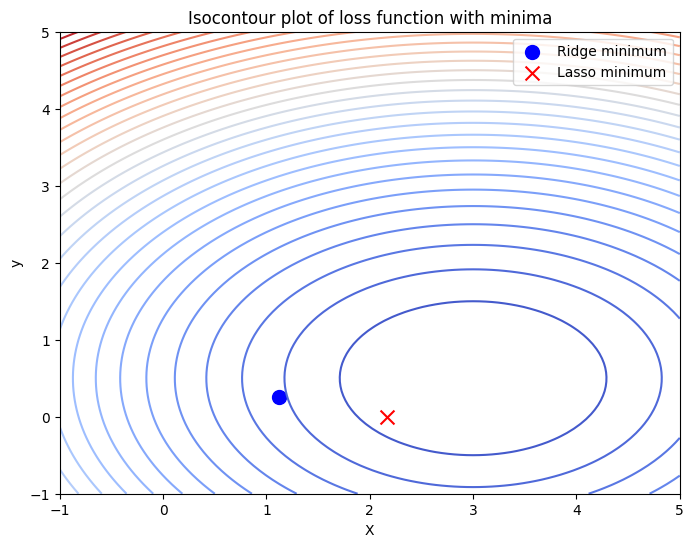

In [21]:
# Generate contour plot
x_vals = np.linspace(-1, 5, 100)
y_vals = np.linspace(-1, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_function(X, Y)

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=30, cmap='coolwarm')

# Plot minima found by ridge and lasso
ridge_min = ridge_history[-1]
lasso_min = lasso_history[-1]
plt.scatter(ridge_min[0], ridge_min[1], color='blue', label='Ridge minimum', marker='o', s=100)
plt.scatter(lasso_min[0], lasso_min[1], color='red', label='Lasso minimum', marker='x', s=100)

plt.xlabel('X')
plt.ylabel('y')
plt.title('Isocontour plot of loss function with minima')
plt.legend()
plt.show()

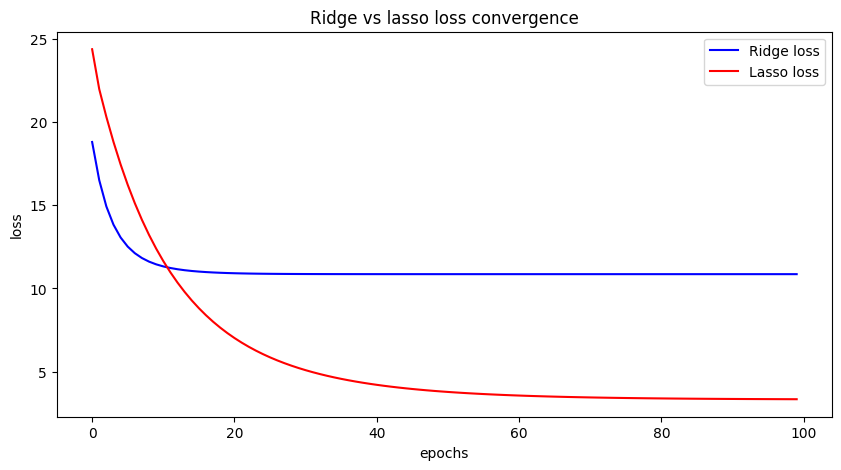

In [22]:
# Plot convergence
plt.figure(figsize=(10, 5))
ridge_losses = [h[2] for h in ridge_history]
lasso_losses = [h[2] for h in lasso_history]
plt.plot(ridge_losses, label='Ridge loss', color='blue')
plt.plot(lasso_losses, label='Lasso loss', color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Ridge vs lasso loss convergence')
plt.legend()
plt.show()

Final ridge params: x = 1.1249999975317673, y = 0.24999999975483336
Final lasso params: x = 2.1624569061612706, y = 1.7646280170316783e-06


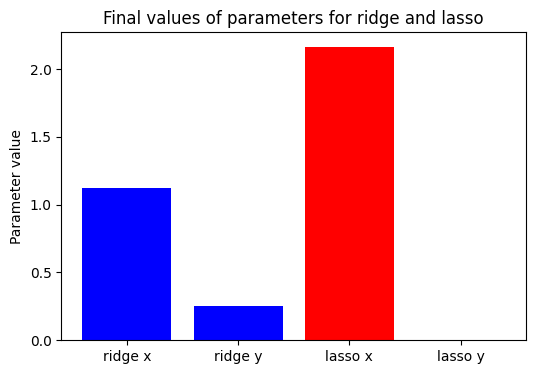

In [23]:
# Print final values of params
print(f"Final ridge params: x = {ridge_min[0]}, y = {ridge_min[1]}")
print(f"Final lasso params: x = {lasso_min[0]}, y = {lasso_min[1]}")

# Plot final values of parameters
plt.figure(figsize=(6, 4))
plt.bar(["ridge x", "ridge y", "lasso x", "lasso y"],
        [ridge_min[0], ridge_min[1], lasso_min[0], lasso_min[1]],
        color=['blue', 'blue', 'red', 'red'])
plt.ylabel('Parameter value')
plt.title('Final values of parameters for ridge and lasso')
plt.show()

### Regression with regularization

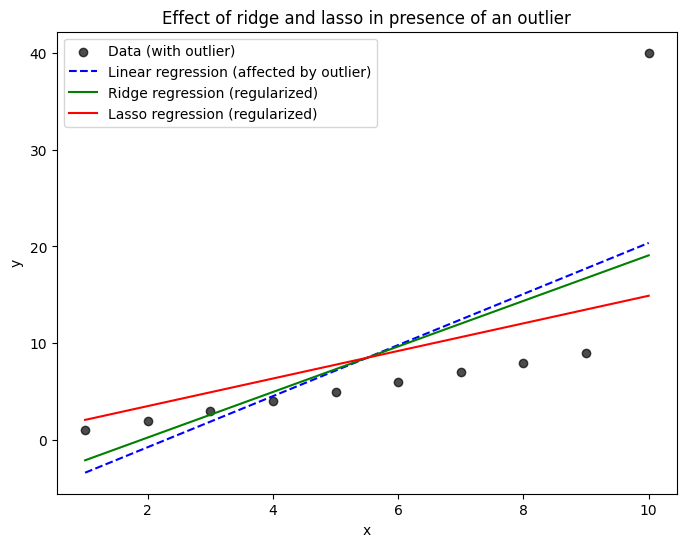

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Define a dataset with an extreme outlier
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 40])   # outlier at the last index

# Fit models
lin_reg = LinearRegression().fit(x, y)
ridge_reg = Ridge(alpha=10).fit(x, y)
lasso_reg = Lasso(alpha=10).fit(x, y)

# Predicted values
x_pred = np.linspace(1, 10, 100).reshape(-1, 1)
y_pred_lin = lin_reg.predict(x_pred)
y_pred_ridge = ridge_reg.predict(x_pred)
y_pred_lasso = lasso_reg.predict(x_pred)

# Plot results 
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='black', label='Data (with outlier)', alpha=0.7)
plt.plot(x_pred, y_pred_lin, label='Linear regression (affected by outlier)', color='blue', linestyle='dashed')
plt.plot(x_pred, y_pred_ridge, label='Ridge regression (regularized)', color='green')
plt.plot(x_pred, y_pred_lasso, label='Lasso regression (regularized)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of ridge and lasso in presence of an outlier')
plt.legend()
plt.show()